<a href="https://colab.research.google.com/github/NehaSontakk/BATH-Prokka-Comparison/blob/main/Plot_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gffpandas
!sudo apt-get install bedops
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.8/178.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gffpandas: filename=gffpandas-1.2.0-py2.py3-none-any.whl size=6246 sha256=f920822849955b5a642b4706f43aaaf8adf6542fd9de1ad078f8d40cef9c5804
  Stored in directory: /root/.cache/pip/wheels/57/87/f1/1d0c74fbc5151562ba7953dc110a7d8c63c6c3229d025bc8cd
Successfully built gffpandas
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libjansson4 tcsh
The following NEW packages will be installed:
  bedops libjansson4 tcsh
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,922 kB of archives.
After this operation, 10.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libjansson4 amd64 2.13.1-1.1build3 [32.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tcsh amd64 6.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import subprocess
import matplotlib.pyplot as plt
import gffpandas.gffpandas as gffpd
from Bio import SeqIO
from glob import glob
from pathlib import Path

In [3]:
prokka_annotations = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Iteration_Sep30/PROKKA_Oct3/unhashed_combined_binned_unbinned.gff'

In [4]:
annotation = gffpd.read_gff3(prokka_annotations)
combined_df = annotation.filter_feature_of_type(['CDS'])
attr_to_columns = combined_df.attributes_to_columns()
prokka_proteins = pd.DataFrame(attr_to_columns)
prokka_proteins['start'] = prokka_proteins['start'].astype(int)
prokka_proteins['end'] = prokka_proteins['end'].astype(int)

/usr/local/lib/python3.10/dist-packages/gffpandas/gffpandas.py:32: DtypeWarning: Columns (1,2,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_table(self._gff_file, comment='#',


In [5]:
prokka_proteins

,seq_id,source,type,start,end,score,strand,phase,attributes,ID,Name,db_xref,eC_number,gene,inference,locus_tag,note,product
0,NODE_16543_length_5404_cov_2.090484_bin.67,Prodigal:002006,CDS,22,174,.,+,0,ID=GLCIONJA_00001;inference=ab initio predicti...,GLCIONJA_00001,None,None,None,None,ab initio prediction:Prodigal:002006,GLCIONJA_00001,None,hypothetical protein
1,NODE_16543_length_5404_cov_2.090484_bin.67,Prodigal:002006,CDS,1380,1553,.,-,0,ID=GLCIONJA_00002;inference=ab initio predicti...,GLCIONJA_00002,None,None,None,None,ab initio prediction:Prodigal:002006,GLCIONJA_00002,None,hypothetical protein
2,NODE_16543_length_5404_cov_2.090484_bin.67,Prodigal:002006,CDS,1528,1674,.,-,0,ID=GLCIONJA_00003;inference=ab initio predicti...,GLCIONJA_00003,None,None,None,None,ab initio prediction:Prodigal:002006,GLCIONJA_00003,None,hypothetical protein
3,NODE_16543_length_5404_cov_2.090484_bin.67,Prodigal:002006,CDS,1671,1805,.,-,0,ID=GLCIONJA_00004;inference=ab initio predicti...,GLCIONJA_00004,None,None,None,None,ab initio prediction:Prodigal:002006,GLCIONJA_00004,None,hypothetical protein
4,NODE_16543_length_5404_cov_2.090484_bin.67,Prodigal:002006,CDS,1807,2292,.,-,0,ID=GLCIONJA_00005;inference=ab initio predicti...,GLCIONJA_00005,None,None,None,None,ab initio prediction:Prodigal:002006,GLCIONJA_00005,None,hypothetical protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76089,NODE_62470_length_1000_cov_2.526984_unbinned,Prodigal:002006,CDS,20,607,.,+,0,ID=GLCIONJA_76071;inference=ab initio predicti...,GLCIONJA_76071,None,None,None,None,ab initio prediction:Prodigal:002006,GLCIONJA_76071,None,hypothetical protein
76090,NODE_62472_length_1000_cov_2.474074_unbinned,Prodigal:002006,CDS,441,983,.,-,0,ID=GLCIONJA_76072;inference=ab initio predicti...,GLCIONJA_76072,None,None,None,None,ab initio prediction:Prodigal:002006,GLCIONJA_76072,None,hypothetical protein
76091,NODE_62474_length_1000_cov_2.432804_unbinned,Prodigal:002006,CDS,66,359,.,+,0,ID=GLCIONJA_76073;inference=ab initio predicti...,GLCIONJA_76073,None,None,None,None,ab initio prediction:Prodigal:002006,GLCIONJA_76073,None,hypothetical protein
76092,NODE_62474_length_1000_cov_2.432804_unbinned,Prodigal:002006,CDS,453,938,.,-,0,ID=GLCIONJA_76074;inference=ab initio predicti...,GLCIONJA_76074,None,None,None,None,ab initio prediction:Prodigal:002006,GLCIONJA_76074,None,hypothetical protein


In [6]:
coverage_intervals = {
    "1.4-1.6": (1.4, 1.6),
    "1.9-2.1": (1.9, 2.1),
    "2.4-2.6": (2.4, 2.6),
    "3.8-4.2": (3.8, 4.2),
    "7.5-8.5": (7.5, 8.5)
}

# Function to find coverage interval
def get_coverage_interval(coverage):
    for interval, (low, high) in coverage_intervals.items():
        if low <= coverage <= high:
            return interval
    return "Outside defined intervals"

# Function to check bin status and find coverage interval
def categorize_row(row):
    parts = row['seq_id'].split('_')
    coverage = float(parts[5])

    # Check for bin status
    if "bin" in row['seq_id']:
        bin_status = "binned"
    elif "unbinned" in row['seq_id']:
        bin_status = "unbinned"
    else:
        bin_status = "unknown"

    # Find the coverage interval
    interval = get_coverage_interval(coverage)

    return pd.Series([interval, bin_status])

# Apply the function to create new columns
prokka_proteins[['coverage interval', 'bin status']] = prokka_proteins.apply(categorize_row, axis=1)

# Display the updated DataFrame
print(prokka_proteins)


                                             seq_id           source type  \
0        NODE_16543_length_5404_cov_2.090484_bin.67  Prodigal:002006  CDS   
1        NODE_16543_length_5404_cov_2.090484_bin.67  Prodigal:002006  CDS   
2        NODE_16543_length_5404_cov_2.090484_bin.67  Prodigal:002006  CDS   
3        NODE_16543_length_5404_cov_2.090484_bin.67  Prodigal:002006  CDS   
4        NODE_16543_length_5404_cov_2.090484_bin.67  Prodigal:002006  CDS   
...                                             ...              ...  ...   
76089  NODE_62470_length_1000_cov_2.526984_unbinned  Prodigal:002006  CDS   
76090  NODE_62472_length_1000_cov_2.474074_unbinned  Prodigal:002006  CDS   
76091  NODE_62474_length_1000_cov_2.432804_unbinned  Prodigal:002006  CDS   
76092  NODE_62474_length_1000_cov_2.432804_unbinned  Prodigal:002006  CDS   
76093  NODE_62475_length_1000_cov_2.424339_unbinned  Prodigal:002006  CDS   

       start   end score strand phase  \
0         22   174     .      +   

In [7]:
prodigal = prokka_proteins[prokka_proteins['product']=='hypothetical protein']

In [8]:
prokka_proteins.to_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Iteration_Sep30/prokka_binned_unbinned_Oct7.xlsx")

In [17]:
bath_dataframe = pd.read_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Iteration_Sep30/dedup_combinned_binned_unbinned_sep30.xlsx")

In [18]:
bath_dataframe

,Unnamed: 0,target name,accession,query name,accession1,hmm len,hmm from,hmm to,seq len,ali from,...,bias,shifts,stops,pipe,description of target,strand,ali from flip,ali to flip,coverage interval,bin status
0,0,NODE_10005_length_3878_cov_2.511117_bin.33,-,MF_01952,-,228,2,227,3878,746,...,0.1,0,0,std,-,+,NaN,NaN,2.4-2.6,binned
1,1,NODE_10021_length_4245_cov_2.538425_bin.94,-,P0A9J8,-,386,5,253,4245,3539,...,0.0,0,0,std,-,+,NaN,NaN,2.4-2.6,binned
2,2,NODE_10022_length_2530_cov_2.013737_bin.68,-,MF_00387,-,262,3,253,2530,506,...,4.6,0,0,std,-,+,NaN,NaN,1.9-2.1,binned
3,3,NODE_10034_length_3867_cov_1.920776_bin.10,-,MF_00847,-,555,326,383,3867,3541,...,0.0,0,0,std,-,+,NaN,NaN,1.9-2.1,binned
4,4,NODE_10038_length_3272_cov_2.444514_bin.3,-,Q58505,-,218,2,207,3272,230,...,0.4,0,0,std,-,+,NaN,NaN,2.4-2.6,binned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21999,11103,NODE_9995_length_4032_cov_2.496354_bin.23,-,MF_01026,-,469,333,466,4032,533,...,0.0,2,0,fs,-,-,132.0,533.0,2.4-2.6,binned
22000,11104,NODE_9995_length_4032_cov_2.496354_bin.23,-,MF_01027,-,416,1,414,4032,1375,...,0.0,1,0,fs,-,-,135.0,1375.0,2.4-2.6,binned
22001,11105,NODE_9995_length_4032_cov_2.496354_bin.23,-,A5N6T4,-,453,3,446,4032,3372,...,0.0,0,0,std,-,-,2041.0,3372.0,2.4-2.6,binned
22002,11106,NODE_9995_length_4032_cov_2.496354_bin.23,-,MF_00548,-,269,124,265,4032,3995,...,5.5,0,0,std,-,-,3546.0,3995.0,2.4-2.6,binned


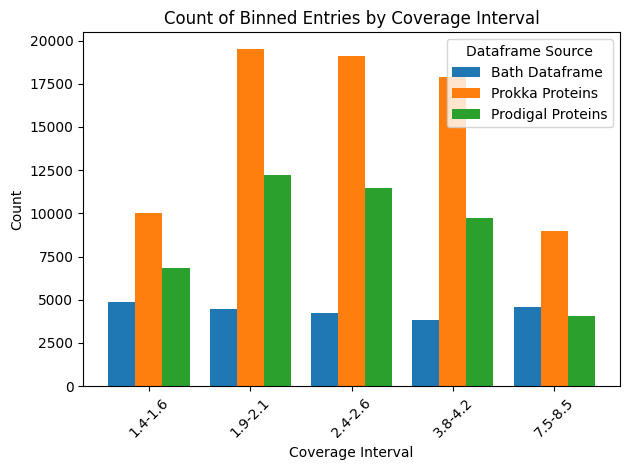

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter to only "binned" rows
bath_binned = bath_dataframe[bath_dataframe['bin status'] == 'binned']
prokka_binned = prokka_proteins[prokka_proteins['bin status'] == 'binned']
prodigal = prodigal[prodigal['bin status'] == 'binned']

# Count occurrences of each coverage interval
bath_counts = bath_binned['coverage interval'].value_counts().sort_index()
prokka_counts = prokka_binned['coverage interval'].value_counts().sort_index()
prodigal_counts = prodigal['coverage interval'].value_counts().sort_index()

# Align intervals in both dataframes to handle any missing intervals
all_intervals = sorted(set(bath_counts.index).union(set(prokka_counts.index)).union(set(prodigal_counts.index)))
bath_counts = bath_counts.reindex(all_intervals, fill_value=0)
prokka_counts = prokka_counts.reindex(all_intervals, fill_value=0)
prodigal_counts = prodigal_counts.reindex(all_intervals, fill_value=0)

# Create a DataFrame for easier plotting
counts_df = pd.DataFrame({
    'Bath Dataframe': bath_counts,
    'Prokka Proteins': prokka_counts,
    'Prodigal Proteins': prodigal_counts
})

# Plotting
counts_df.plot(kind='bar', width=0.8)
plt.title('Count of Binned Entries by Coverage Interval')
plt.xlabel('Coverage Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Dataframe Source')
plt.tight_layout()  # Adjust layout for readability
plt.show()


In [21]:
bath_counts

,count
coverage interval,
1.4-1.6,4861
1.9-2.1,4475
2.4-2.6,4232
3.8-4.2,3857
7.5-8.5,4579


Empty DataFrame
Columns: [Unnamed: 0, target name, accession, query name, accession1, hmm len, hmm from, hmm to, seq len, ali from, ali to, env from, env to, E-value, score, bias, shifts, stops, pipe, description of target, strand, ali from flip, ali to flip, coverage interval, bin status]
Index: []

[0 rows x 25 columns]


IndexError: index 0 is out of bounds for axis 0 with size 0

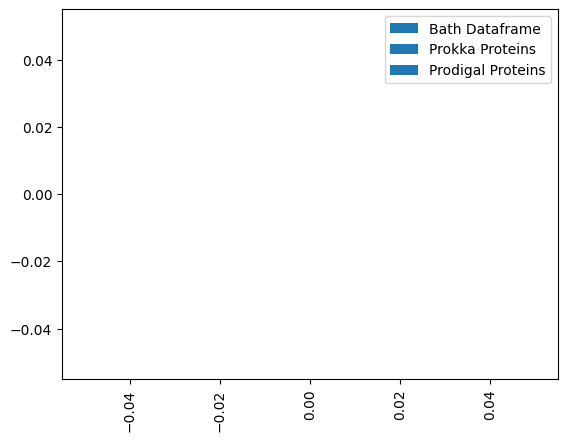

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter to only "binned" rows
bath_binned = bath_dataframe[bath_dataframe['bin status'] == 'unbinned']
print(bath_binned)
prokka_binned = prokka_proteins[prokka_proteins['bin status'] == 'unbinned']
prodigal = prodigal[prodigal['bin status'] == 'unbinned']

# Count occurrences of each coverage interval
bath_counts = bath_binned['coverage interval'].value_counts().sort_index()
prokka_counts = prokka_binned['coverage interval'].value_counts().sort_index()
prodigal_counts = prodigal['coverage interval'].value_counts().sort_index()

# Align intervals in both dataframes to handle any missing intervals
all_intervals = sorted(set(bath_counts.index).union(set(prokka_counts.index)).union(set(prodigal_counts.index)))
bath_counts = bath_counts.reindex(all_intervals, fill_value=0)
prokka_counts = prokka_counts.reindex(all_intervals, fill_value=0)
prodigal_counts = prodigal_counts.reindex(all_intervals, fill_value=0)

# Create a DataFrame for easier plotting
counts_df = pd.DataFrame({
    'Bath Dataframe': bath_counts,
    'Prokka Proteins': prokka_counts,
    'Prodigal Proteins': prodigal_counts
})

# Plotting
counts_df.plot(kind='bar', width=0.8)
plt.title('Count of Binned Entries by Coverage Interval')
plt.xlabel('Coverage Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Dataframe Source')
plt.tight_layout()  # Adjust layout for readability
plt.show()
